In [6]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

# Data cleaning
import re
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
# Open labeled and unlabeled tables
job_class_train = pd.read_csv('../job-etl/data/csv/job_20221116.csv', usecols=[0, 1, 13], nrows=600)
job_class_test = pd.read_csv('../job-etl/data/csv/job_20221107.csv', usecols=[0, 1], skiprows=range(1,601))

In [3]:
# Table slicing validation
print(job_class_train.shape)
print(job_class_test.shape)

(600, 3)
(150, 2)


In [4]:
job_class_train.head()

,id,title,it_spec
0,3301070910,(Brazil) Junior Business Development Specialis...,0
1,3264776485,(Evento SEnEC) - Desenvolvedor SW Junior - Clo...,1
2,3306116559,(G) Técnico De Suporte - Júnior,1
3,3325496787,[Meios de pagamento] QA Júnior,1
4,3303776344,Academia SAP UTILITIES 2022,0


In [5]:
job_class_test.head()

,id,title
0,3297961535,Assistente De Suporte Júnior
1,3284953269,Remote Data Analyst / Scientist Jobs
2,3315663201,App Dev Architecture - Sao Paulo
3,3268243972,"Solution Sales Specialist – Security, Complian..."
4,3325496787,[Meios de pagamento] QA Júnior


In [26]:
# Job class distribution
labels = job_class_train['it_spec'].unique()
values = job_class_train.groupby('it_spec').size()
fig = px.pie(job_class_train, values=values, names=['Não_TI', 'TI'], hole= .4, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(textposition='outside', textinfo='percent+label', hoverinfo='label+percent+name')
fig.update_layout(width = 700, height = 400, margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [27]:
# Title word count
job_class_train['word_count'] = job_class_train['title'].apply(lambda x: len(str(x).split()))
print("Os títulos de vagas de TI tem em média {} palavras. \n".format(job_class_train[job_class_train['it_spec']==1]['word_count'].mean().round(2))) # IT jobs
print("Os títulos de vagas Não-TI tem em média {} palavras. \n".format(job_class_train[job_class_train['it_spec']==0]['word_count'].mean().round(2))) # Non-IT jobs

Os títulos de vagas de TI tem em média 4.9 palavras. 

Os títulos de vagas Não-TI tem em média 4.62 palavras. 



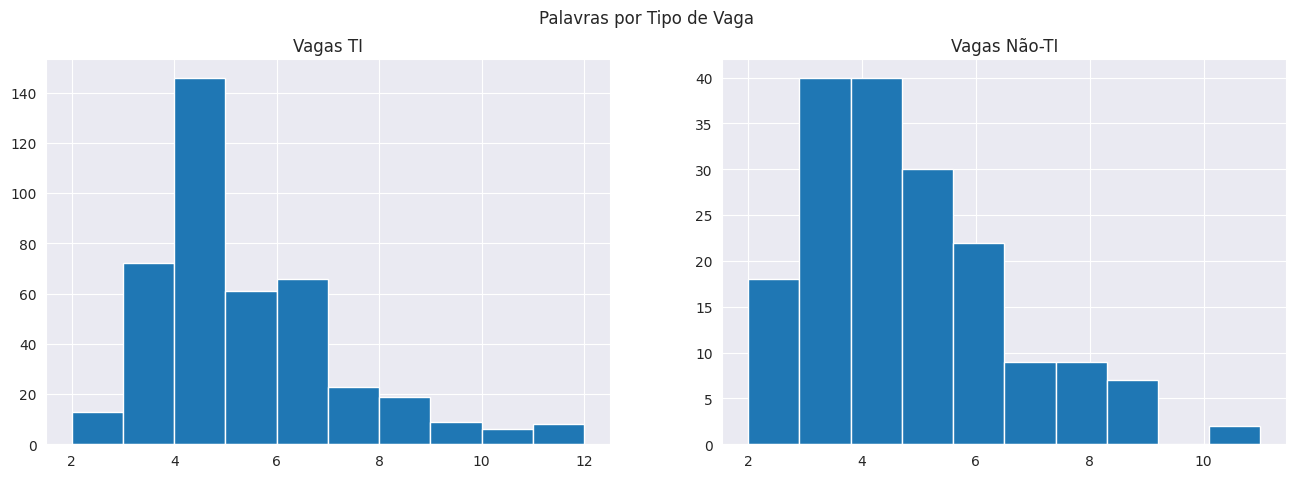

In [28]:
# Word count plot
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 5))
titles_it = job_class_train[job_class_train['it_spec']==1]['word_count']
ax1.hist(titles_it)
ax1.set_title('Vagas TI')
titles_nit = job_class_train[job_class_train['it_spec']==0]['word_count']
ax2.hist(titles_nit)
ax2.set_title('Vagas Não-TI')
fig.suptitle('Palavras por Tipo de Vaga')
plt.show()

In [29]:
# Title character count
job_class_train['char_count'] = job_class_train['title'].apply(lambda x: len(str(x)))
print("Os títulos de vagas de TI tem em média {} caracteres. \n".format(job_class_train[job_class_train['it_spec']==1]['char_count'].mean().round(2))) # IT jobs
print("Os títulos de vagas Não-TI tem em média {} caracteres. \n".format(job_class_train[job_class_train['it_spec']==0]['char_count'].mean().round(2))) # Non-IT jobs

Os títulos de vagas de TI tem em média 34.41 caracteres. 

Os títulos de vagas Não-TI tem em média 32.64 caracteres. 



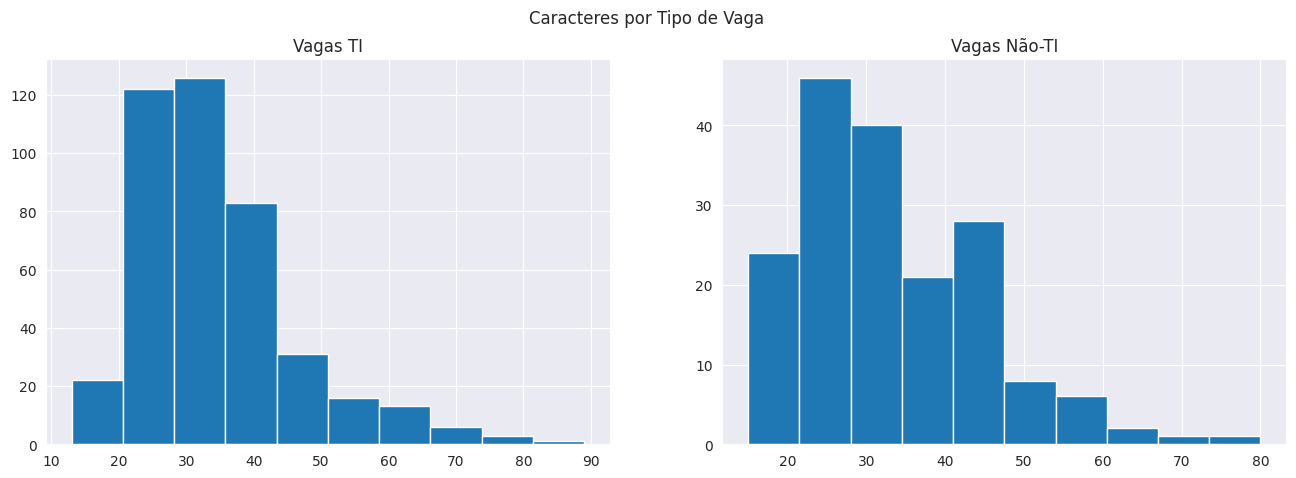

In [30]:
# Character count plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 5))
titles_it = job_class_train[job_class_train['it_spec']==1]['char_count']
ax1.hist(titles_it)
ax1.set_title('Vagas TI')
titles_nit = job_class_train[job_class_train['it_spec']==0]['char_count']
ax2.hist(titles_nit)
ax2.set_title('Vagas Não-TI')
fig.suptitle('Caracteres por Tipo de Vaga')
plt.show()

In [73]:
# Preprocessing Data

# Lowercase text
lowercase = job_class_train['title'].str.lower()
strip_text = lowercase.str.strip()
#split_text = re.split(r'\s+', strip_text)

print(type(strip_text))

<class 'pandas.core.series.Series'>


In [3]:
# Preprocess regex pattens
def preprocess(text):
    # Lowercase titles
    text = text.str.lower()
    # Remove whitespaces
    text = text.str.strip()
    # Split strings
    text = text.str.split()
    # Remove digits
    text = re.sub(r'\d','', str(text))
    # Remove special characters
    text = re.sub(r'\(|\)|/|-','', str(text))
    # Remove unicode characters
    text = unicodedata.normalize('NFD', str(text))
    text = text.encode('ascii', 'ignore')
    text = text.decode('utf-8')
    print(text)
    
preprocess(job_class_train['title'].sample(10)) 

                [desenvolvedor, junior, full, stack]
    [engenheiro, de, machine, learning, junior, ...
           [desenvolvedor, c#,vb, junior, ou, pleno]
              [analista, de, suporte, junior, smarsa]
    [assistente, de, compras, junior, hortolandia...
                  [junior, project, manager, latam]
                               [analista, de, testes]
        [remote, junior, fullstack, developer, jobs]
                [remote, fullstack, developer, jobs]
                [atendente, junior, valinhos, , sp]
Name: title, dtype: object


In [7]:
# Tokenize data
Counter(word_tokenize(str(job_class_train['title'])))


Counter({'0': 1,
         '(': 3,
         'Brazil': 1,
         ')': 3,
         'Junior': 2,
         'Business': 1,
         'Development': 1,
         'Specialis': 1,
         '...': 3,
         '1': 1,
         'Evento': 1,
         'SEnEC': 1,
         '-': 3,
         'Desenvolvedor': 1,
         'SW': 1,
         'Clo': 1,
         '2': 1,
         'G': 1,
         'Técnico': 1,
         'De': 1,
         'Suporte': 1,
         'Júnior': 2,
         '3': 1,
         '[': 1,
         'Meios': 1,
         'de': 1,
         'pagamento': 1,
         ']': 1,
         'QA': 1,
         '4': 1,
         'Academia': 1,
         'SAP': 1,
         'UTILITIES': 1,
         '2022': 1,
         '595': 1,
         'Remote': 5,
         'Perl': 1,
         'Developer': 5,
         'Jobs': 5,
         '596': 1,
         'Python': 2,
         '597': 1,
         '598': 1,
         'React': 2,
         'Native': 2,
         '599': 1,
         'Name': 1,
         ':': 3,
         'title': 1,
    

In [39]:
# Preprocess data
def preprocess(text):
    text = text.lower()
    text = text.strip()
    text = re.split('\s+', text)
    
    
    text = re.compile('[%]').sub('', text)
    text = re.compile('(%)').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('-', ' ', text)
    text = re.sub('/', ' ', text)

    text = re.sub('\s+', ' ', text)  
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    
    locations = ['brasil', 'sao paulo', 'curitiba', 'campinas']
    position_specs = ['junior', 'jr', 'assistant', 'pleno', 'senior', 'job']
    for i in range(0, len(locations)):
        text = re.sub(locations[i], '', text)
    
    for i in range (0, len(position_specs)):
        text = re.sub(position_specs[i], '', text)
     
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words(['english', 'portuguese', 'spanish'])]
    return ' '.join(a)

# Lemmatization
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [44]:
train['clean_title'] = train['title'].apply(lambda x: finalpreprocess(x))


AttributeError: 'NoneType' object has no attribute 'split'